# Trabalho 01 - Resistência dos Materiais MAC015 - Turma X 2024.3
___

- Ana Beatriz Lana Maciel Moreira Armond (202165501B)
- Gabriella Cruz e Silva (202165512B)

In [ ]:
# Importando bibliotecas
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Atividade 02
___

Seja uma viga biapoiada genérica submetida a uma série de carregamentos, conforme indicado na
figura (a). Escreva um programa computacional para calcular as reações de apoio em A e B. Teste o
programa para as vigas (b) e (c).

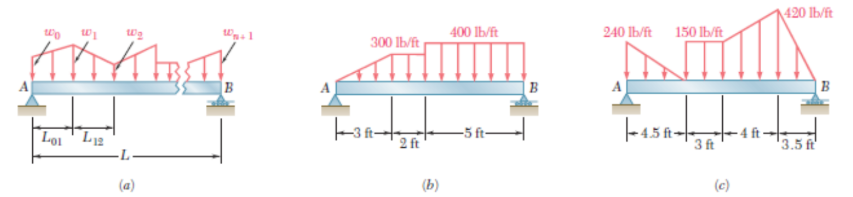

## Relatório da Atividade

O código tem como objetivo realizar a análise de uma viga sujeita a diferentes tipos de carregamentos (constantes e lineares) e calcular as reações nos apoios com base no equilíbrio estático. Além disso, ele representa graficamente a viga, seus apoios e os carregamentos aplicados.

## Estrutura do Código
- Classe Support: Representa os apoios na viga. Cada apoio tem reações (força vertical, reação horizontal, e momento) e uma posição associada. A classe oferece métodos para calcular as reações e fornece uma representação textual desses apoios.

- Classe Load: Classe base para os carregamentos. Define a posição inicial e final do carregamento, e calcula a força total vertical e o momento total gerado por ele. Para calcular essas propriedades, a classe utiliza a ferramenta de álgebra simbólica da biblioteca sympy.

- Classes ConstantLoad e LinearLoad: Derivadas da classe Load, essas classes representam carregamentos com intensidade constante ou linear ao longo de um trecho da viga. Ambas as classes definem funções específicas para suas distribuições de carga e cálculo de forças e momentos.

- Classe Beam: Representa a viga como um sistema completo. Ela possui métodos para adicionar apoios e carregamentos, calcular as reações nos apoios, e analisar a viga como um todo. O cálculo das reações é feito resolvendo o sistema de equações de equilíbrio (forças verticais e momentos).

- Função draw_beam: Utiliza a biblioteca matplotlib para desenhar a viga, apoios e carregamentos de maneira visual. A função normaliza as intensidades dos carregamentos para uma visualização mais clara.

## Bibliotecas Utilizadas
- sympy: Utilizada para manipulação simbólica, especialmente no cálculo das forças verticais e momentos totais gerados pelos carregamentos, bem como na solução do sistema de equações de equilíbrio estático.

- matplotlib: Usada para criar gráficos e desenhar a viga, os apoios e os carregamentos. Essa visualização ajuda a entender a distribuição de forças e momentos ao longo da viga.

## Técnicas Utilizadas
- Integração Simbólica: A ferramenta de álgebra simbólica do sympy é usada para integrar as funções que representam os carregamentos, a fim de calcular a força total vertical e o momento gerado. Esse cálculo simbólico é eficiente para representar de forma exata as equações, sem precisar de discretizações numéricas.

- Solução de Sistemas de Equações Simbólicas: As reações nos apoios são determinadas a partir de um sistema de equações que envolvem o equilíbrio das forças verticais e dos momentos. O sympy.solve resolve essas equações para encontrar as reações de forma simbólica.

## Escolhas de Implementação
- Reações nos Apoios: As reações são calculadas simbolicamente com base nos carregamentos aplicados. As equações de equilíbrio de forças e momentos são resolvidas para determinar as reações verticais e momentos nos apoios.

- Representação Visual dos Carregamentos: A visualização foi projetada para ser clara e informativa, normalizando as intensidades para facilitar a leitura do gráfico.

- Cálculos Simbólicos: Usar o sympy para realizar os cálculos simbólicos em vez de usar métodos numéricos, como a integração numérica, proporciona uma representação exata das soluções, o que é crucial para uma análise estrutural precisa.

In [ ]:
# Classe que representa os apoios na viga, responsáveis por gerar reações
class Support:
    def __init__(self, rx, ry, rm, position, label):
        # Restrições nos eixos X, Y e momento
        self.rx = rx
        self.ry = ry
        self.rm = rm
        # Posição do apoio na viga
        self.position = position
        # Rótulo para identificação do apoio
        self.label = label

    # Representação do apoio, mostrando restrições e reações calculadas
    def __repr__(self):
        return (f"\nApoio {self.label}:\n"
                f"  Posição: {self.position}\n"
                f"  Restrições: Rx={self.rx}, Ry={self.ry}\n")

# Classe base para carregamentos distribuídos (usada por cargas constantes e lineares)
class Load:
    def __init__(self, start, end, label):
        self.start = start          # Posição inicial do carregamento
        self.end = end              # Posição final do carregamento
        self.label = label          # Rótulo para identificação
        self.x = sp.symbols('x')    # Variável simbólica para integração

    @property
    # Retorna a função simplificada do carregamento
    def load_function(self):
        simplified_function = self.function.subs(self.variables)
        return simplified_function.subs({self.x: self.x - self.start}) if simplified_function.has(self.x) else simplified_function

    @property
    # Calcula a força total vertical como a integral do carregamento
    def total_force_y(self):
        return sp.integrate(self.load_function, (self.x, self.start, self.end))

    @property
    # Calcula o momento total gerado pelo carregamento
    def total_moment(self):
        return sp.integrate(self.load_function * self.x, (self.x, self.start, self.end))

    # Avalia a carga em um ponto específico
    def __call__(self, x):
        return self.load_function.subs({self.x: x})

    # Representação do carregamento, mostrando ponto inicial e final
    def __repr__(self):
        return (f"\nCarregamento {self.label}:\n"
                f"  Início: {self.start}\n"
                f"  Fim: {self.end}\n")

# Classe para carregamentos constantes
class ConstantLoad(Load):
    def __init__(self, start, end, label, intensity):
        self.intensity = intensity                      # Intensidade constante do carregamento
        self.variables = {sp.symbols('a'): intensity}   # Variável simbólica associada
        super().__init__(start, end, label)

    @property
    # Função constante do carregamento
    def function(self):
        return sp.symbols('a')

    # Adiciona a intensidade à representação do carregamento
    def __repr__(self):
        base_repr = super().__repr__()
        return base_repr + f"  Intensidade Constante: {self.intensity}\n"

# Classe para carregamentos lineares
class LinearLoad(Load):
    def __init__(self, start, end, label, start_intensity, end_intensity):
        # Intensidade no início do carregamento
        self.start_intensity = start_intensity
        # Intensidade no final do carregamento
        self.end_intensity = end_intensity
        # Cálculo da inclinação e do termo constante da função linear
        self.slope = (end_intensity - start_intensity) / (end - start)
        self.intercept = start_intensity
        self.variables = {
            sp.symbols('a'): self.slope,
            sp.symbols('b'): self.intercept
        }
        super().__init__(start, end, label)

    @property
    # Função linear que descreve o carregamento
    def function(self):
        return sp.symbols('a') * self.x + sp.symbols('b')

    # Adiciona as intensidades inicial e final à representação do carregamento
    def __repr__(self):
        base_repr = super().__repr__()
        return (base_repr +
                f"  Intensidade Inicial: {self.start_intensity}\n"
                f"  Intensidade Final: {self.end_intensity}\n")

# Classe para representar a viga como um sistema completo
class Beam:
    def __init__(self, length, forces=None, loads=None, supports=None):
        self.length = length                             # Comprimento total da viga
        self.loads = loads if loads else []              # Lista de carregamentos
        self.supports = supports if supports else []     # Lista de apoios
        self.x = sp.symbols('x')                         # Variável simbólica para análise

    # Adiciona um carregamento à viga
    def add_load(self, load):
        self.loads.append(load)

    # Adiciona um apoio à viga
    def add_support(self, support):
        self.supports.append(support)

    # Soma das forças verticais dos carregamentos
    def total_vertical_forces(self):
        return sum(load.total_force_y for load in self.loads)

    # Soma dos momentos gerados por carregamentos
    def total_moments(self):
        return sum(load.total_moment for load in self.loads)

    # Calcula as reações nos apoios com base no equilíbrio estático
    def calculate_support_reactions(self):
        total_fy = self.total_vertical_forces()
        total_m = self.total_moments()

        # Criação de variáveis simbólicas para reações
        reaction_y_symbols = [sp.symbols(f"R_{support.label}y") for support in self.supports if support.ry]
        reaction_m_symbols = [sp.symbols(f"R_{support.label}m") for support in self.supports if support.rm]

        # Termos de momento gerados pelas reações verticais
        moment_terms = [sp.symbols(f"R_{support.label}y") * support.position for support in self.supports if support.ry]

        # Equações de equilíbrio (força e momento)
        eq_fy = sp.Eq(total_fy + sum(reaction_y_symbols), 0)
        eq_m = sp.Eq(total_m + sum(moment_terms) + sum(reaction_m_symbols), 0)

        # Resolução do sistema de equações
        solutions = sp.solve((eq_fy, eq_m), reaction_y_symbols + reaction_m_symbols)

        # Atualiza as reações calculadas nos apoios
        for support in self.supports:
            support.reaction_y = solutions.get(sp.symbols(f"R_{support.label}y"), 0)
            support.reaction_m = solutions.get(sp.symbols(f"R_{support.label}m"), 0)

        return solutions

    # Método principal para análise da viga
    def analyze(self):
        return self.calculate_support_reactions()

    # Representação da viga com seus elementos
    def __repr__(self):
        return (f"\nViga:\n"
                f"  Comprimento: {self.length}\n"
                f"  Carregamentos: {''.join(map(str, self.loads))}\n"
                f"  Apoios: {''.join(map(str, self.supports))}\n")

# Função para desenhar a viga e os elementos associados
def draw_beam(beam):
    fig, ax = plt.subplots(figsize=(12, 3))

    # Desenha a linha representando a viga
    ax.plot([0, beam.length], [0, 0], color="black", linewidth=2, label="Viga")

    # Desenha os apoios
    for support in beam.supports:
        ax.scatter(support.position, 0, color="blue", s=50, label="Apoio" if 'Apoio' not in ax.get_legend_handles_labels()[1] else "")
        ax.text(support.position, -0.2, f"{support.label}", ha="center", va="top", fontsize=10)

    # Normaliza a intensidade dos carregamentos para visualização
    max_val = max(
        [abs(load.start_intensity) for load in beam.loads if isinstance(load, LinearLoad)] +
        [abs(load.intensity) for load in beam.loads if isinstance(load, ConstantLoad)]
    )

    # Desenha os carregamentos
    first = True
    for load in beam.loads:
        x = np.linspace(load.start, load.end, 100)
        y = np.linspace(-load.start_intensity / max_val, -load.end_intensity / max_val, 100) if isinstance(load, LinearLoad) else -load.intensity / max_val
        ax.fill_between(x, y, color="green", label='Carregamento' if first else None, alpha=0.5)
        first = False

    # Configurações visuais adicionais
    ax.axhline(0, color="gray", linewidth=0.5, linestyle="--")
    ax.set_xlim(-0.1 * beam.length, 1.1 * beam.length)
    ax.set_ylim(-1, 1)
    ax.set_aspect("equal")
    ax.axis("off")
    ax.legend()
    plt.show()

___

## Viga B

> Solução pelo FTOOL
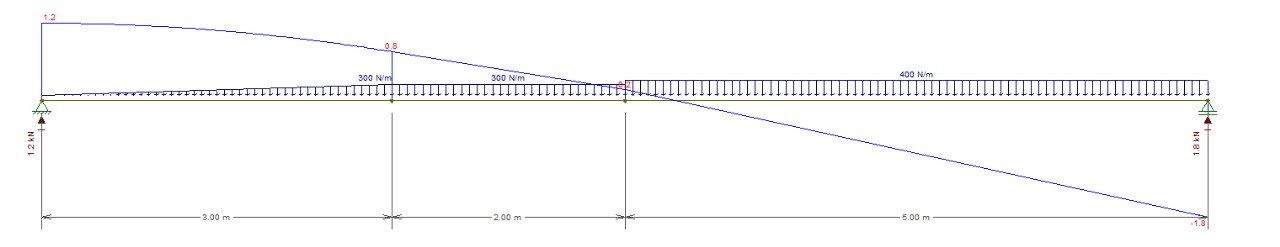

### A = 1.2kN ou 1200N
### B = 1.8kN ou 1800N

Informações da viga:

Viga:
  Comprimento: 10
  Carregamentos: 
Carregamento w1:
  Início: 0
  Fim: 3
  Intensidade Inicial: 0
  Intensidade Final: -300

Carregamento w2:
  Início: 3
  Fim: 5
  Intensidade Constante: -300

Carregamento w3:
  Início: 5
  Fim: 10
  Intensidade Constante: -400

  Apoios: 
Apoio A:
  Posição: 0
  Restrições: Rx=1, Ry=1

Apoio B:
  Posição: 10
  Restrições: Rx=0, Ry=1



Reações nos apoios:
{R_Ay: 1220.00000000000, R_By: 1830.00000000000}


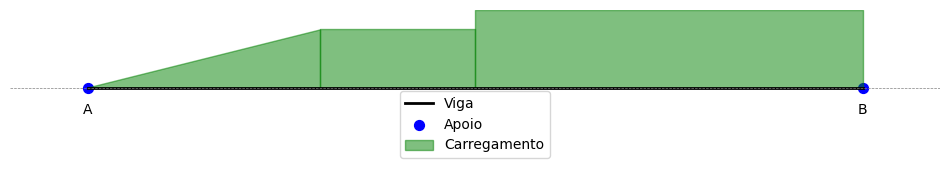

In [ ]:
# Situação da Viga B

length = 10  # Comprimento

# Apoios
supports = [
    Support(rx=1, ry=1, rm=0, position=0, label='A'),
    Support(rx=0, ry=1, rm=0, position=10, label='B'),
]

# Carregamentos
loads = [
    LinearLoad(start=0, end=3, label='w1', start_intensity=0, end_intensity=-300),
    ConstantLoad(start=3, end=5, label='w2', intensity=-300),
    ConstantLoad(start=5, end=10, label='w3', intensity=-400),
]

# Viga
beam = Beam(length=length, loads=loads, supports=supports)

# Exibe informações
print("Informações da viga:")
print(beam)
print("\nReações nos apoios:")
print(beam.analyze())

# Desenha a viga
draw_beam(beam)

Podemos ver que o nosso programa apresenta resultados que convergem com o que foi obtido no FTOOL, com uma precisão ainda maior, sendo $A = 1220N$ e $B = 1830N$. Além disso, o programa faz a plotagem do sistema analisado.

___

## Viga C

> Solução pelo FTOOL
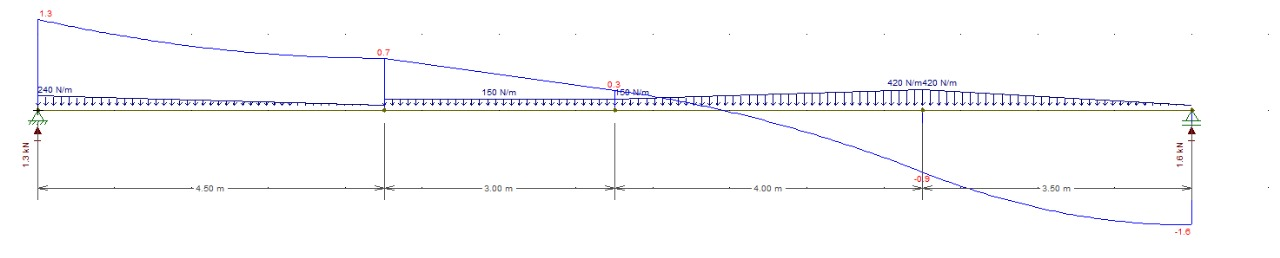

### A = 1.3kN ou 1300N
### B = 1.6kN ou 1600N

Informações da viga:

Viga:
  Comprimento: 15
  Carregamentos: 
Carregamento w1:
  Início: 0
  Fim: 4.5
  Intensidade Inicial: -240
  Intensidade Final: 0

Carregamento w2:
  Início: 4.5
  Fim: 7.5
  Intensidade Constante: -150

Carregamento w3:
  Início: 7.5
  Fim: 11.5
  Intensidade Inicial: -150
  Intensidade Final: -420

Carregamento w4:
  Início: 11.5
  Fim: 15
  Intensidade Inicial: -420
  Intensidade Final: 0

  Apoios: 
Apoio A:
  Posição: 0
  Restrições: Rx=0, Ry=1

Apoio B:
  Posição: 15
  Restrições: Rx=1, Ry=1



Reações nos apoios:
{R_Ay: 1264.33333333333, R_By: 1600.66666666667}


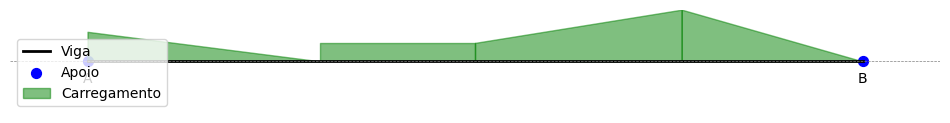

In [ ]:
# Situação da Viga C

length = 15  # Comprimento

# Apoios
supports = [
    Support(rx=0, ry=1, rm=0, position=0, label='A'),
    Support(rx=1, ry=1, rm=0, position=15, label='B'),
]

# Carregamentos
loads = [
    LinearLoad(start=0, end=4.5, label='w1', start_intensity=-240, end_intensity=0),
    ConstantLoad(start=4.5, end=7.5, label='w2', intensity=-150),
    LinearLoad(start=7.5, end=11.5, label='w3', start_intensity=-150, end_intensity=-420),
    LinearLoad(start=11.5, end=15, label='w4', start_intensity=-420, end_intensity=0),
]

# Viga
beam = Beam(length=length, loads=loads, supports=supports)

# Exibe informações
print("Informações da viga:")
print(beam)
print("\nReações nos apoios:")
print(beam.analyze())

# Desenha a viga
draw_beam(beam)

No nosso programa obtivemos, com aproximação de duas casas decimais, $A = 1264,33N$ e $B = 1600.67N$.